# Build Book Recommendation System

1. Import our dependencies
2. Load dataset
3. Understand dataset
4. Data Wrangling (Already done)
5. Pre-processing steps (We will perform the pre-processing steps as and when needed)
6. Build recommendation system
   6.1 Simple recommendation system
        6.1.1 Implement model
        6.1.2 Evaluate Result

##  1. Import libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import warnings; warnings.simplefilter('ignore')

## 2. Load dataset

In [9]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


## 3. Understand dataset

#### Ratings dataframe

In [10]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


The ratings data set has 3 fields.

   * userId: The unique id for every unique user.
   * ISBN: The International Standard Book Number which is unique for every book.
   * bookRating: The rating given to the book.
    


#### Books dataframe

In [11]:
books.head()


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

   * ISBN: The International Standard Book Number which is unique for every book
   * bookTitle: The title of the book
   * bookAuthor: The name of the author the group.
   * yearOfPublication: The year of publication of the book
   * publisher: The publisher of the book.
   

In [13]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### Users dataframe

In [14]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

   * userId: The unique id for every unique user
   * Location: The location of the user
   * Age: The age of the user

In [16]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
ratings_books_merge=pd.merge(books,ratings,on='ISBN')

In [18]:
ratings_books_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
ISBN                 1031136 non-null object
bookTitle            1031136 non-null object
bookAuthor           1031135 non-null object
yearOfPublication    1031136 non-null object
publisher            1031134 non-null object
imageUrlS            1031136 non-null object
imageUrlM            1031136 non-null object
imageUrlL            1031132 non-null object
userID               1031136 non-null int64
bookRating           1031136 non-null int64
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


## 4. Data Wrangling

 * Already converted data from json to csv format

## 5. Pre-processing

In [19]:
ratings_users_merge=pd.merge(users,ratings,on='userID')

In [20]:
ratings_users_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
userID        1149780 non-null int64
Location      1149780 non-null object
Age           840288 non-null float64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 52.6+ MB


In [21]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [22]:

average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


## 6. Building Recommendation System

Approach:

   * The Simple Recommender offers generalized recommendations to every user based on book popularity.

   * The basic idea behind this recommender is that books that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience

   * I will use IMDB's weighted rating formula to construct my chart.
   * Mathematically, it is represented as follows:
    $\large Weighted\; Rating (WR) = (\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

    where,
        v is the number of votes for the book
        m is the minimum votes required to be listed in the chart
        R is the average rating of the book
        C is the mean vote across the whole report

In [23]:
# Calculate all the components based on the above formula
v=average_rating['bookRating']
R=average_rating['ratingCount']
C=average_rating['bookRating'].mean()
m=average_rating['ratingCount'].quantile(0.95)

In [24]:
average_rating['weighted_average']=((R*v)+ (C*m))/(v+m)

In [25]:
average_rating.head()

,bookRating,ratingCount,weighted_average
ISBN,,,
0330299891,3.0,2,2.725842
0375404120,1.5,2,2.820517
0586045007,0.0,1,2.943595
9022906116,3.5,2,2.698959
9032803328,0.0,1,2.943595


In [26]:
books_sorted_ranking=average_rating.sort_values('weighted_average',ascending=False)

In [27]:
books_merged=pd.merge(books,books_sorted_ranking,on='ISBN')

In [28]:
books_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 270151 entries, 0 to 270150
Data columns (total 11 columns):
ISBN                 270151 non-null object
bookTitle            270151 non-null object
bookAuthor           270150 non-null object
yearOfPublication    270151 non-null object
publisher            270149 non-null object
imageUrlS            270151 non-null object
imageUrlM            270151 non-null object
imageUrlL            270148 non-null object
bookRating           270151 non-null float64
ratingCount          270151 non-null int64
weighted_average     270151 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 24.7+ MB


In [29]:
books_merged[['bookTitle','bookAuthor','bookRating','ratingCount','weighted_average']].head()

,bookTitle,bookAuthor,bookRating,ratingCount,weighted_average
0,Classical Mythology,Mark P. O. Morford,0.000000,1,2.943595
1,Clara Callan,Richard Bruce Wright,4.928571,14,6.593796
2,Decision in Normandy,Carlo D'Este,5.000000,3,2.962397
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,4.272727,11,5.355385
4,The Mummies of Urumchi,E. J. W. Barber,0.000000,1,2.943595


In [32]:
books_sorted_ranking2=books_merged.sort_values('weighted_average',ascending=False)

In [33]:
books_sorted_ranking2[['bookTitle','bookAuthor','bookRating','ratingCount','weighted_average']].head()

,bookTitle,bookAuthor,bookRating,ratingCount,weighted_average
408,The Lovely Bones: A Novel,Alice Sebold,4.468726,1295,402.000563
748,The Da Vinci Code,Dan Brown,4.652322,883,282.374087
26,Wild Animus,Rich Shapero,1.019584,2502,234.168175
522,The Red Tent (Bestselling Backlist),Anita Diamant,4.334716,723,220.683538
1105,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,3.448087,732,189.873539


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

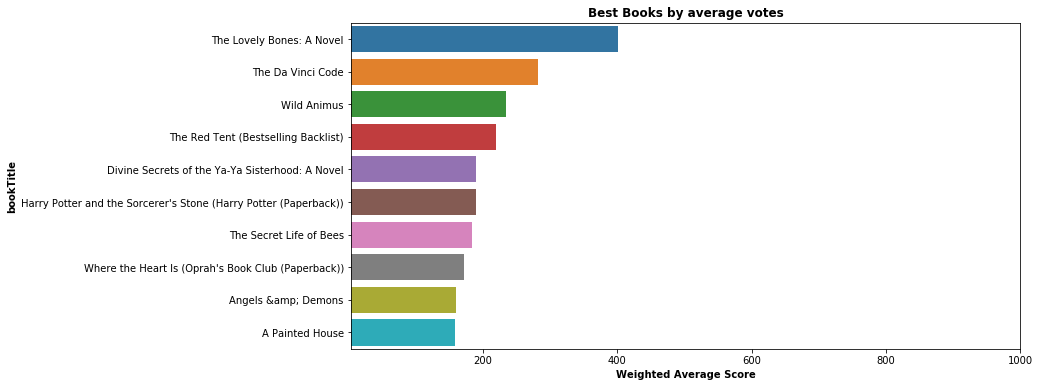

In [35]:

weight_average=books_sorted_ranking2.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['bookTitle'].head(10), data=weight_average)
plt.xlim(4, 1000)
plt.title('Best Books by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('bookTitle', weight='bold')
plt.savefig('best_movies.png')